## Step 1: Generate Synthetic Data


In [1]:
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

# Generating synthetic data
np.random.seed(0)
data_size = 200
features = np.random.rand(data_size, 2)  # Two features: visit duration and pages visited
labels = (features[:, 0] + features[:, 1] > 1).astype(int)  # Purchase (1) or not (0)


In [2]:
# Convert to DataFrame for easier manipulation
df = pd.DataFrame(features, columns=['VisitDuration', 'PagesVisited'])
df['Purchase'] = labels
# Step 2: Preprocess the Data

from sklearn.model_selection import train_test_split
# Split the data
X_train, X_test, y_train, y_test = train_test_split(df[['VisitDuration', 'PagesVisited']], df['Purchase'], test_size=0.2, random_state=42)


In [3]:
# Step 3: Build and Train the Neural Network
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential([
    Dense(10, activation='relu', input_shape=(2,)),  # Input layer with 2 features
    Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [6]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_split=0.2)
# Step 4: Evaluate the Model
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")

Train on 128 samples, validate on 32 samples
Epoch 1/10
128/128 [==============================] - 0s 317us/sample - loss: 0.6595 - acc: 0.7969 - val_loss: 0.6552 - val_acc: 0.7812
Epoch 2/10
128/128 [==============================] - 0s 275us/sample - loss: 0.6559 - acc: 0.7891 - val_loss: 0.6504 - val_acc: 0.8125
Epoch 3/10
128/128 [==============================] - 0s 298us/sample - loss: 0.6529 - acc: 0.7812 - val_loss: 0.6449 - val_acc: 0.8125
Epoch 4/10
128/128 [==============================] - 0s 239us/sample - loss: 0.6484 - acc: 0.8047 - val_loss: 0.6401 - val_acc: 0.8125
Epoch 5/10
128/128 [==============================] - 0s 350us/sample - loss: 0.6448 - acc: 0.8047 - val_loss: 0.6357 - val_acc: 0.8125
Epoch 6/10
128/128 [==============================] - 0s 371us/sample - loss: 0.6411 - acc: 0.8047 - val_loss: 0.6302 - val_acc: 0.8438
Epoch 7/10
128/128 [==============================] - 0s 250us/sample - loss: 0.6370 - acc: 0.8125 - val_loss: 0.6252 - val_acc: 0.8438
Epo

## Visualizing Training Process

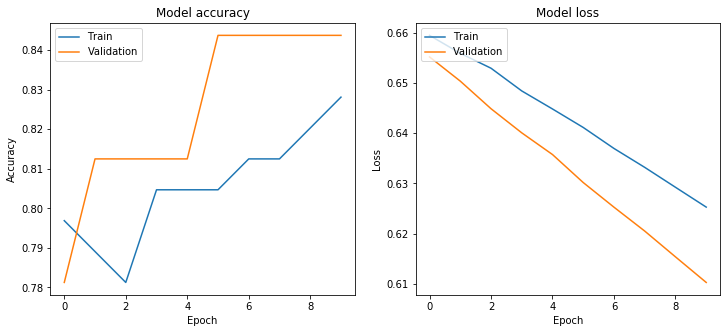

In [9]:
# Plotting training and validation loss and accuracy
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

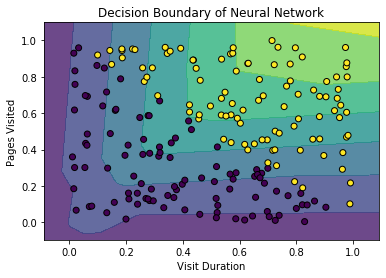

In [10]:
# Generate a grid over the feature space
x_min, x_max = df['VisitDuration'].min() - 0.1, df['VisitDuration'].max() + 0.1
y_min, y_max = df['PagesVisited'].min() - 0.1, df['PagesVisited'].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Predict over the grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the contour and training examples
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(df['VisitDuration'], df['PagesVisited'], c=df['Purchase'], edgecolor='k')
plt.xlabel('Visit Duration')
plt.ylabel('Pages Visited')
plt.title('Decision Boundary of Neural Network')
plt.show()